<a href="https://colab.research.google.com/github/NeginS98/wine-quality-Classification/blob/main/wine_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import random

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [3]:
data = pd.read_csv('winequality-white.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
info = pd.DataFrame({'Missing data': data.isnull().sum(), 
                     'Type of data': data.dtypes, 
                     'Count of Data': len(data)})
info

,Missing data,Type of data,Count of Data
fixed acidity,0,float64,4898
volatile acidity,0,float64,4898
citric acid,0,float64,4898
residual sugar,0,float64,4898
chlorides,0,float64,4898
free sulfur dioxide,0,float64,4898
total sulfur dioxide,0,float64,4898
density,0,float64,4898
pH,0,float64,4898
sulphates,0,float64,4898


In [5]:
# Unique Value
print('quality rate of samples: ',sorted(data['quality'].unique()))

quality rate of samples:  [3, 4, 5, 6, 7, 8, 9]


## **Visualization**

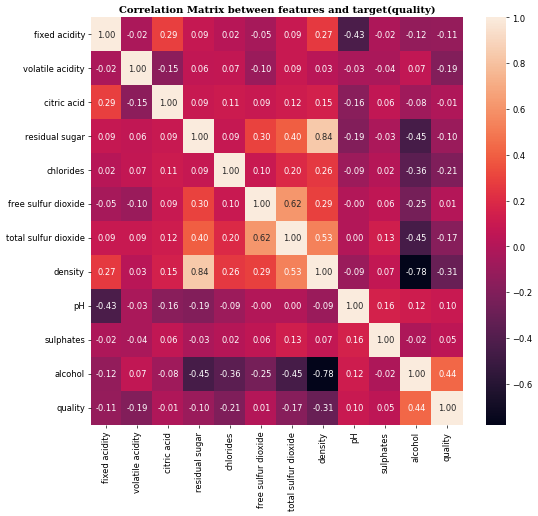

In [6]:
plt.figure(figsize= (10, 9), dpi=60)
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.title('Correlation Matrix between features and target(quality)',
          fontsize =12, fontfamily= 'serif', fontweight='bold')
plt.show()

### **Noise Detection**

In [7]:
col = list(data.columns)

noise = pd.DataFrame()
for index, value in enumerate(col):
  noise.insert(index, f'H {col[index]}', list(data[value].nlargest(5)))
  noise.insert(index , f'L {col[index]}', list(data[value].nsmallest(5)))

noise

,L fixed acidity,L volatile acidity,L citric acid,L residual sugar,L chlorides,L free sulfur dioxide,L total sulfur dioxide,L density,L pH,L sulphates,...,H sulphates,H pH,H density,H total sulfur dioxide,H free sulfur dioxide,H chlorides,H residual sugar,H citric acid,H volatile acidity,H fixed acidity
0,3.8,0.080,0.0,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,...,1.08,3.82,1.03898,440.0,289.0,0.346,65.80,1.66,1.100,14.2
1,3.9,0.080,0.0,0.6,0.012,3.0,10.0,0.98713,2.74,0.23,...,1.06,3.81,1.01030,366.5,146.5,0.301,31.60,1.23,1.005,11.8
2,4.2,0.080,0.0,0.7,0.013,3.0,18.0,0.98722,2.77,0.25,...,1.01,3.80,1.01030,344.0,138.5,0.290,31.60,1.00,0.965,10.7
3,4.2,0.080,0.0,0.7,0.014,3.0,18.0,0.98740,2.79,0.25,...,1.00,3.80,1.00295,313.0,131.0,0.271,26.05,1.00,0.930,10.7
4,4.4,0.085,0.0,0.7,0.014,3.0,19.0,0.98742,2.79,0.25,...,0.99,3.79,1.00295,307.5,128.0,0.255,26.05,1.00,0.910,10.3


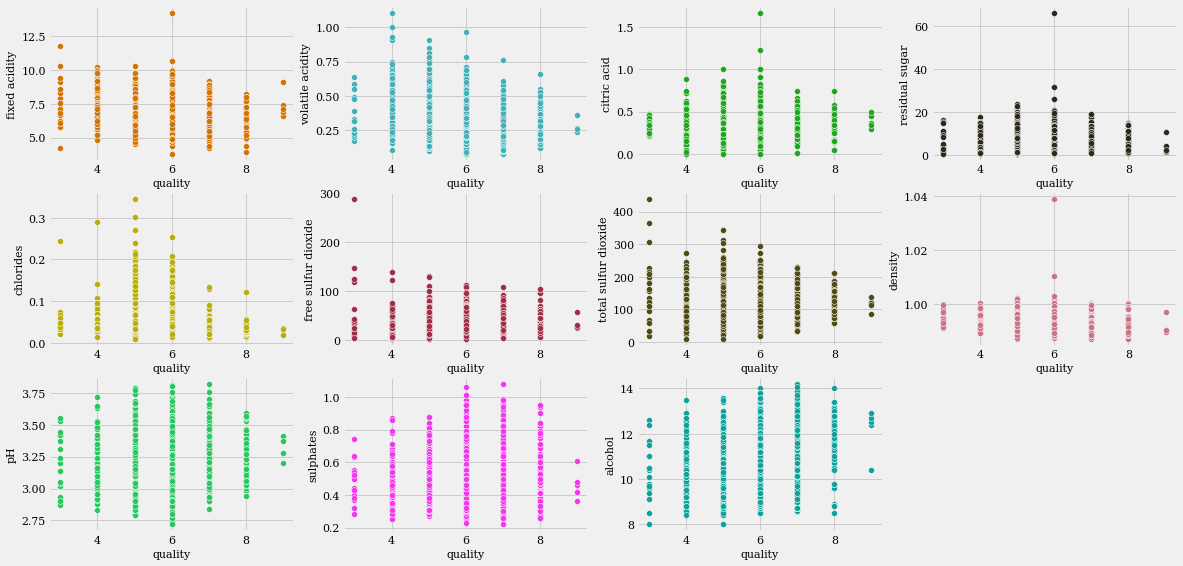

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 9))
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for num in range(11):
    a = random.random()
    b = random.random()
    c = random.random()
    color = (a, b, c)
    ax = plt.subplot(3, 4,num+1)
    col = cols[num]
    sns.scatterplot(ax=ax, data=data, y=data[col], x='quality',color= color)
    plt.xticks(fontsize =11, fontfamily= 'serif')
    plt.yticks(fontsize =11, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =11, fontfamily= 'serif')
    plt.xlabel('quality',fontsize =11, fontfamily= 'serif')


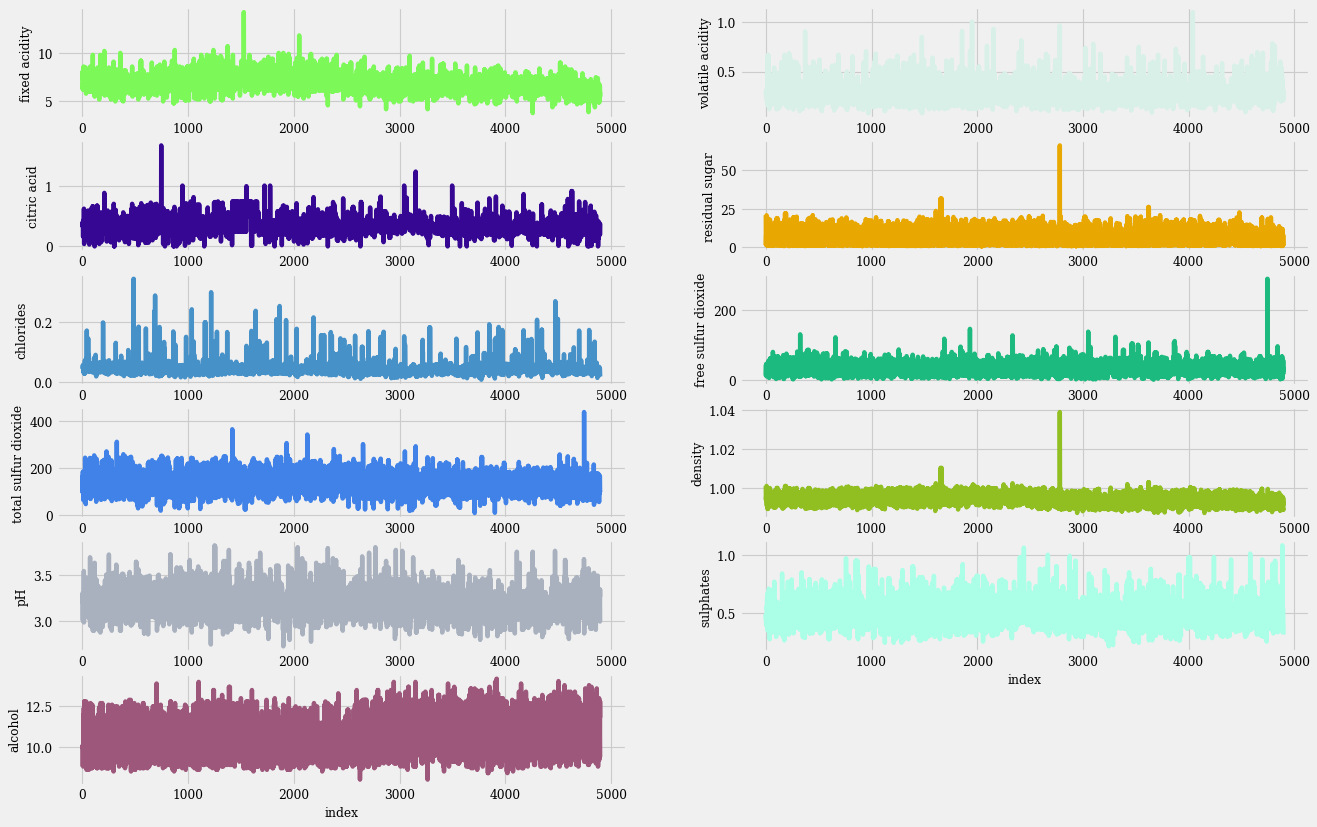

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 12), dpi=80)
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for num in range(11):
    a = random.random()
    b = random.random()
    c = random.random()
    color = (a, b, c)
    ax = plt.subplot(6, 2,num+1)
    col = cols[num]
    sns.lineplot(ax=ax, data=data, y=data[col], x=range(4898),color= color)
    plt.xticks(fontsize =11, fontfamily= 'serif')
    plt.yticks(fontsize =11, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =11, fontfamily= 'serif')
    plt.xlabel('index',fontsize =11, fontfamily= 'serif')


In [10]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

data.drop(data.index[data['fixed acidity'] > 10.7], inplace=True)
data.drop(data.index[data['volatile acidity'] > 1], inplace=True)
data.drop(data.index[data['citric acid'] > 1], inplace=True)
data.drop(data.index[data['residual sugar'] > 30], inplace=True)
data.drop(data[(data['quality'] <= 4) & (data['chlorides'] > 0.2)].index, inplace=True)
data.drop(data.index[data['chlorides'] > 0.3], inplace=True)
data.drop(data.index[data['free sulfur dioxide'] > 200], inplace=True)
data.drop(data.index[data['total sulfur dioxide'] > 300], inplace=True)
data.drop(data.index[data['density'] > 1.02], inplace=True)
data.reset_index(drop=True, inplace=True)

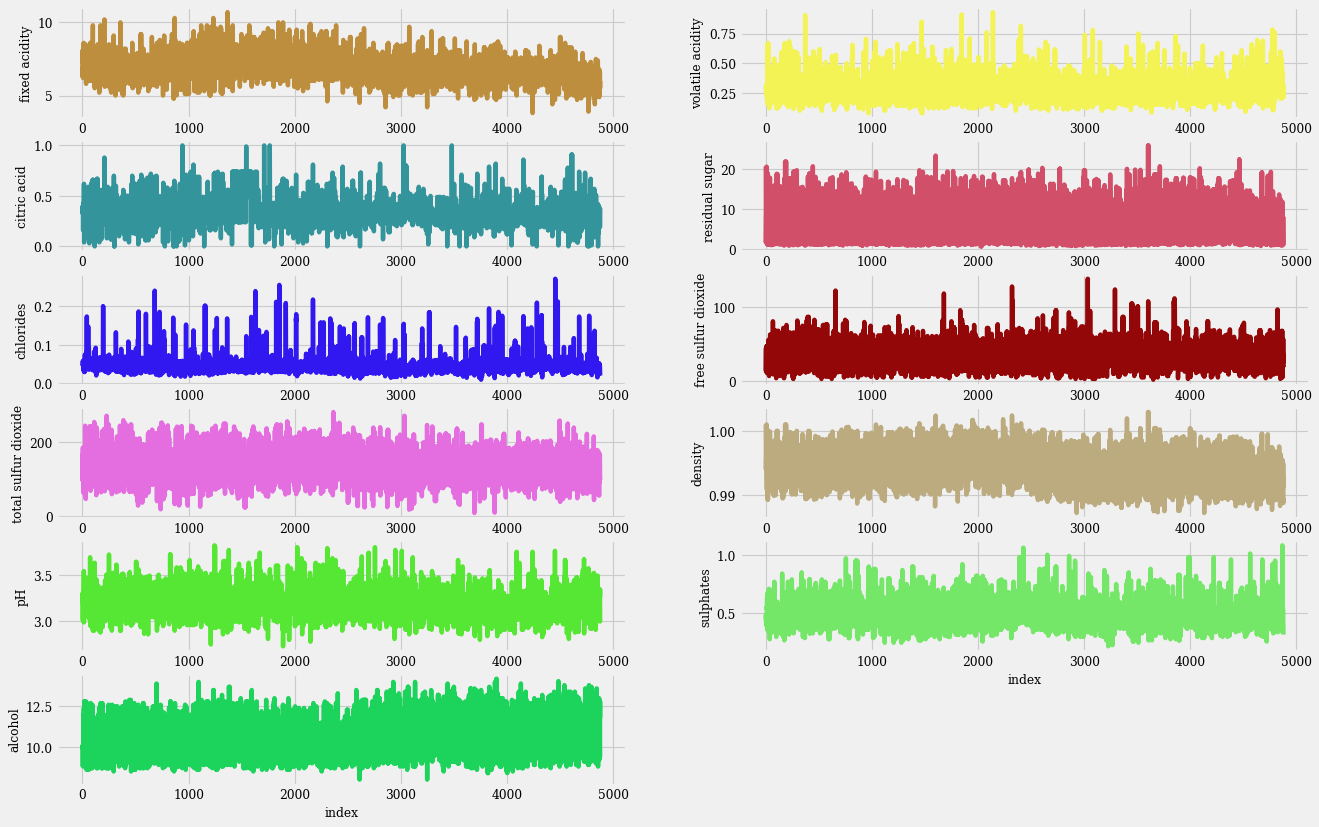

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 12), dpi=80)
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for num in range(11):
    a = random.random()
    b = random.random()
    c = random.random()
    color = (a, b, c)
    ax = plt.subplot(6, 2,num+1)
    col = cols[num]
    sns.lineplot(ax=ax, data=data, y=data[col], x=range(int(data.count().median())),color= color)
    plt.xticks(fontsize =11, fontfamily= 'serif')
    plt.yticks(fontsize =11, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =11, fontfamily= 'serif')
    plt.xlabel('index',fontsize =11, fontfamily= 'serif')


***Corrleation Matrix after noise elemination***



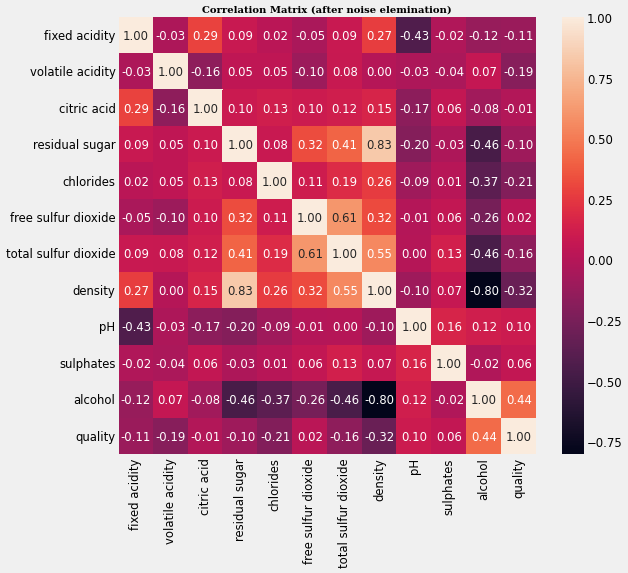

In [12]:
plt.figure(figsize= (10, 9), dpi=60)
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.title('Correlation Matrix (after noise elemination)',
          fontsize =12, fontfamily= 'serif', fontweight='bold')
plt.show()

## **Preprocessing**

In [13]:
df = data.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4874,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4875,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4876,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4877,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [14]:
df['quality label'] = df['quality'].apply(lambda x: 'Low' if x<=5 else 'Medium' if x<=7 else 'High')
rate_level_wine = pd.DataFrame(df[['quality','quality label']].value_counts().sort_index())
rate_level_wine

,,0
quality,quality label,
3,Low,15
4,Low,160
5,Low,1452
6,Medium,2192
7,Medium,880
8,High,175
9,High,5


In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [16]:
df.corr().iloc[11:12,:].T

,quality
fixed acidity,-0.108792
volatile acidity,-0.185768
citric acid,-0.010549
residual sugar,-0.099554
chlorides,-0.206656
free sulfur dioxide,0.023649
total sulfur dioxide,-0.162981
density,-0.315723
pH,0.098147
sulphates,0.058485


### **color palette list of seaborn library**

In [17]:
color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 
        'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
        'GnBu', 'GnBu_r',  'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
        'OrRd_r', 'Oranges', 'Oranges_r',  'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
        'Pastel1', 'Pastel1_r', 'Pastel2',  'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
        'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
        'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu',
        'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
        'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
        'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r',
        'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',  'bone', 'bone_r',
        'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r',  'coolwarm',
        'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',
        'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r',
        'gist_ncar',  'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
        'gist_yarg',  'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
        'gray_r', 'hot', 'hot_r',  'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r',
        'jet', 'jet_r', 'magma', 'magma_r',  'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
        'ocean', 'ocean_r', 'pink', 'pink_r',  'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
        'rainbow_r', 'rocket', 'rocket_r',  'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
        'summer_r', 'tab10', 'tab10_r','tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
        'terrain', 'terrain_r', 'turbo',  'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
        'twilight_shifted_r', 'viridis',  'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']


### **based on quality label**

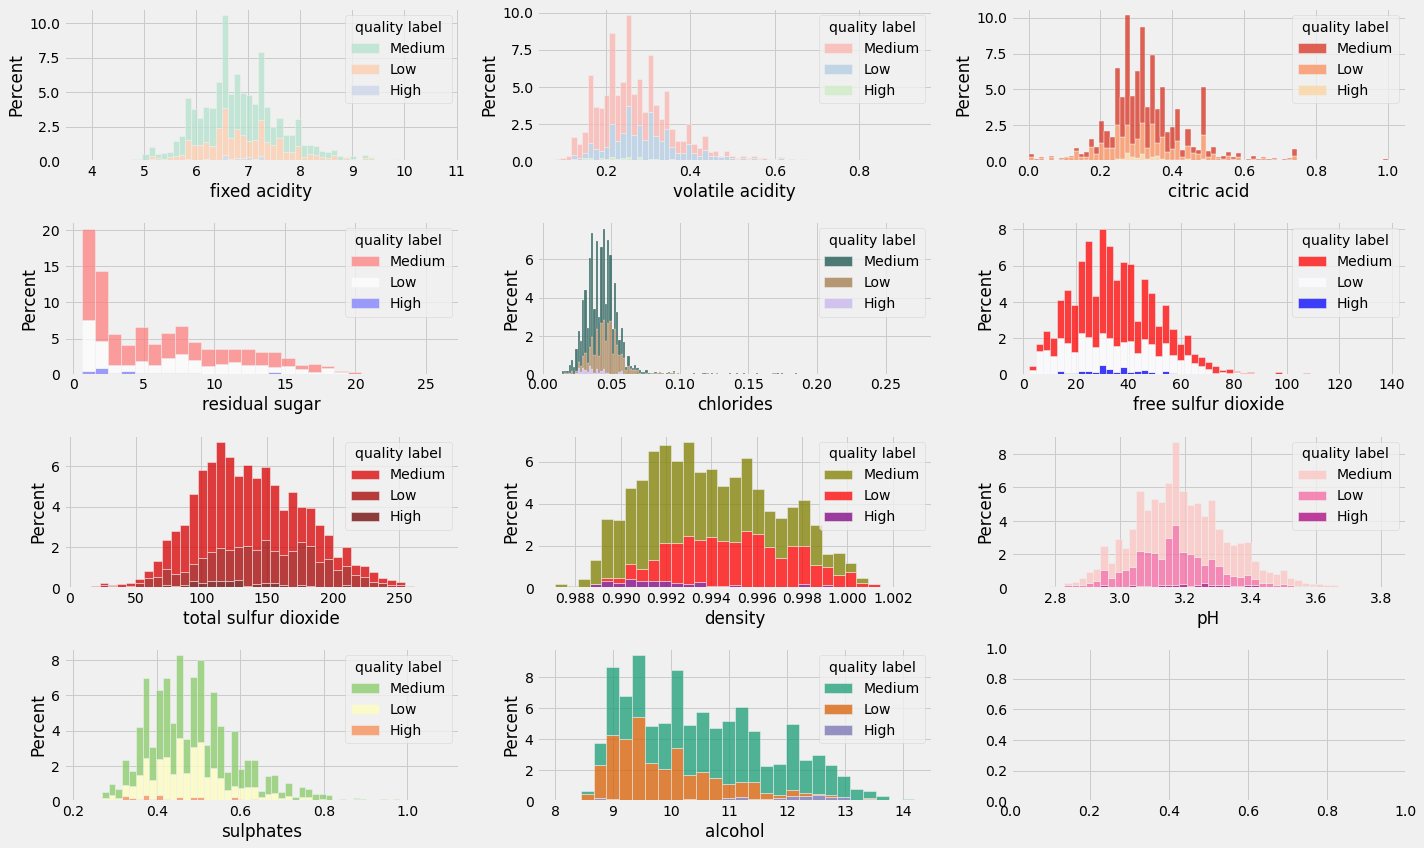

In [18]:
column = df.columns[:-2].values
name = df.columns[:-2]
fig,axes = plt.subplots(4,3,figsize=(20, 12))
count=0
for i in range(4):
    for j in range(3):
        if count >10:
            continue
        sns.histplot(data=df,x=column[count],hue='quality label',stat='percent',
                     multiple='stack',ax=axes[i][j], palette= random.choice(color))
        count+=1
fig.tight_layout()

# **Classification Models**

In [19]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

encoder = LabelEncoder()
df['quality label'] = encoder.fit_transform(df['quality label'])

X = df.drop('quality',axis=1)
y = df.quality

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## **Random Forest Classifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
def RFmodel_accuracy(x, y, testsize):
  eval = pd.DataFrame()
  for TestSize in testsize:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TestSize, random_state=0)
    model = RandomForestClassifier()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    eval_dict = {'test size': TestSize, 
                 'MAE': mean_absolute_error(y_test, y_pred),
                 'MSE':mean_squared_error(y_test, y_pred), 
                 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),
                 'R2 Score':r2_score(y_test, y_pred),
                 }
    eval = eval.append(eval_dict, ignore_index=True)
    
  return (eval)

In [48]:
testsize = np.linspace(0.15, 0.35, 5)
acc_RF = RFmodel_accuracy(X, y, testsize)
color = (acc_RF['R2 Score'] == max(acc_RF['R2 Score'])).map({True: 'background-color: blue', False: ''})
acc_RF.style.apply(lambda s: color)

,test size,MAE,MSE,RMSE,R2 Score
0,0.150000,0.150273,0.153005,0.391159,0.806079
1,0.200000,0.145492,0.151639,0.389409,0.817513
2,0.250000,0.150820,0.155738,0.394636,0.808558
3,0.300000,0.156421,0.161885,0.402350,0.802311
4,0.350000,0.150468,0.156323,0.395377,0.807343


## **Logistic Regression Classifier**

In [61]:
from sklearn.linear_model import LogisticRegression

def LogRegmodel_accuracy(x, y, testsize):
  eval = pd.DataFrame()
  for TestSize in testsize:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TestSize, random_state=0)
    model = LogisticRegression()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    eval_dict = {'test size': TestSize, 
                 'MAE': mean_absolute_error(y_test, y_pred),
                 'MSE':mean_squared_error(y_test, y_pred), 
                 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),
                 'R2 Score':r2_score(y_test, y_pred),
                 }
    eval = eval.append(eval_dict, ignore_index=True)
    
  return (eval)
testsize = np.linspace(0.15, 0.35, 5)
acc_LogReg = LogRegmodel_accuracy(X, y, testsize)
color = (acc_LogReg['R2 Score'] == max(acc_LogReg['R2 Score'])).map({True: 'background-color: chocolate', False: ''})
acc_LogReg.style.apply(lambda s: color)

,test size,MAE,MSE,RMSE,R2 Score
0,0.150000,0.229508,0.232240,0.481913,0.705656
1,0.200000,0.224385,0.230533,0.480138,0.722570
2,0.250000,0.219672,0.224590,0.473909,0.723921
3,0.300000,0.218579,0.224044,0.473333,0.726405
4,0.350000,0.216042,0.221897,0.471059,0.726528


## **Support vector classifier**

In [54]:
from sklearn.svm import SVC

def SVCmodel_accuracy(x, y, testsize):
  eval = pd.DataFrame()
  for TestSize in testsize:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TestSize, random_state=0)
    model = SVC()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    eval_dict = {'test size': TestSize, 
                 'MAE': mean_absolute_error(y_test, y_pred),
                 'MSE':mean_squared_error(y_test, y_pred), 
                 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),
                 'R2 Score':r2_score(y_test, y_pred),
                 }
    eval = eval.append(eval_dict, ignore_index=True)
    
  return (eval)
testsize = np.linspace(0.15, 0.35, 5)
acc_SVC = SVCmodel_accuracy(X, y, testsize)
color = (acc_SVC['R2 Score'] == max(acc_SVC['R2 Score'])).map({True: 'background-color: blue', False: ''})
acc_SVC.style.apply(lambda s: color)

,test size,MAE,MSE,RMSE,R2 Score
0,0.150000,0.211749,0.214481,0.463121,0.728165
1,0.200000,0.202869,0.209016,0.457183,0.748463
2,0.250000,0.200000,0.204918,0.452679,0.748103
3,0.300000,0.208333,0.213798,0.462383,0.738917
4,0.350000,0.204918,0.210773,0.459100,0.740238


## **KNeighbors Classifier**

In [56]:
from sklearn.neighbors import KNeighborsClassifier

def KNNmodel_accuracy(x, y, testsize):
  eval = pd.DataFrame()
  for TestSize in testsize:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TestSize, random_state=0)
    model = KNeighborsClassifier()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    eval_dict = {'test size': TestSize, 
                 'MAE': mean_absolute_error(y_test, y_pred),
                 'MSE':mean_squared_error(y_test, y_pred), 
                 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),
                 'R2 Score':r2_score(y_test, y_pred),
                 }
    eval = eval.append(eval_dict, ignore_index=True)
    
  return (eval)
testsize = np.linspace(0.15, 0.35, 5)
acc_KNN = KNNmodel_accuracy(X, y, testsize)
color = (acc_KNN['R2 Score'] == max(acc_KNN['R2 Score'])).map({True: 'background-color: darkblue', False: ''})
acc_KNN.style.apply(lambda s: color)

,test size,MAE,MSE,RMSE,R2 Score
0,0.150000,0.226776,0.245902,0.495885,0.688342
1,0.200000,0.229508,0.266393,0.516133,0.679414
2,0.250000,0.224590,0.259016,0.508937,0.681602
3,0.300000,0.227459,0.258880,0.508802,0.683864
4,0.350000,0.226581,0.251171,0.501170,0.690450


## **GaussianNB Classifier**

In [57]:
from sklearn.naive_bayes import GaussianNB

def GNBmodel_accuracy(x, y, testsize):
  eval = pd.DataFrame()
  for TestSize in testsize:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TestSize, random_state=0)
    model = GaussianNB()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    eval_dict = {'test size': TestSize, 
                 'MAE': mean_absolute_error(y_test, y_pred),
                 'MSE':mean_squared_error(y_test, y_pred), 
                 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),
                 'R2 Score':r2_score(y_test, y_pred),
                 }
    eval = eval.append(eval_dict, ignore_index=True)
    
  return (eval)
testsize = np.linspace(0.15, 0.35, 5)
acc_GNB = GNBmodel_accuracy(X, y, testsize)
color = (acc_GNB['R2 Score'] == max(acc_GNB['R2 Score'])).map({True: 'background-color: darkred', False: ''})
acc_GNB.style.apply(lambda s: color)

,test size,MAE,MSE,RMSE,R2 Score
0,0.150000,0.284153,0.286885,0.535617,0.636399
1,0.200000,0.266393,0.268443,0.518114,0.676948
2,0.250000,0.270492,0.273770,0.523231,0.663465
3,0.300000,0.258197,0.260929,0.510812,0.681362
4,0.350000,0.259368,0.264052,0.513859,0.674576


# **Final Result**

In [114]:
General_Acc = pd.DataFrame({
              'R2 Score_RF': acc_RF['R2 Score'],
              'R2 Score_LogReg': acc_LogReg['R2 Score'],
              'R2 Score_SVC': acc_SVC['R2 Score'],
              'R2 Score_GNB': acc_GNB['R2 Score'],             
              'R2 Score_KNN': acc_KNN['R2 Score'],
              'testsize':  testsize,
})
General_Acc.set_index("testsize", inplace = True)
General_Acc

,R2 Score_RF,R2 Score_LogReg,R2 Score_SVC,R2 Score_GNB,R2 Score_KNN
testsize,,,,,
0.15,0.728165,0.705656,0.728165,0.636399,0.688342
0.20,0.748463,0.722570,0.748463,0.676948,0.679414
0.25,0.748103,0.723921,0.748103,0.663465,0.681602
0.30,0.738917,0.726405,0.738917,0.681362,0.683864
0.35,0.740238,0.726528,0.740238,0.674576,0.690450


In [237]:
s2 = General_Acc.style
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;font-weight:bold;background-color:darkcyan', axis=0)
s2.set_caption("Final Accuracy dataframe based on 5 models which we earlier discussed")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.4em; background-color: grey ;color:cyan;font-family:serif',
 }], overwrite=False)


,R2 Score_RF,R2 Score_LogReg,R2 Score_SVC,R2 Score_GNB,R2 Score_KNN
testsize,,,,,
0.15,0.728165,0.705656,0.728165,0.636399,0.688342
0.19999999999999998,0.748463,0.722570,0.748463,0.676948,0.679414
0.25,0.748103,0.723921,0.748103,0.663465,0.681602
0.3,0.738917,0.726405,0.738917,0.681362,0.683864
0.35,0.740238,0.726528,0.740238,0.674576,0.690450


## **confusion_matrix**

In [225]:
def cm_plot(y_test, y_pred, model_name, color_palette='magma'):
  plt.figure(figsize=(5, 4), dpi=80)
  plt.title(f'Confusion Matrix (Actual Quality value Vs Predicted value by {model_name}',
            fontfamily='serif', fontweight='bold')
  sns.set(font_scale=1.08)
  sns.heatmap(confusion_matrix(y_test, y_pred),fmt='3.0f', annot=True, 
              annot_kws={"size": 10}, cmap=color_palette)
  plt.show()

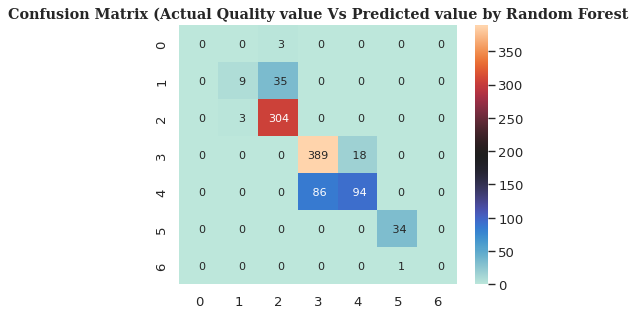

In [236]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = RandomForestClassifier()
model.fit(x_train , y_train)
y_pred_RF = model.predict(x_test)
cm_plot(y_test, y_pred_RF, 'Random Forest', 'icefire')

In [169]:
from sklearn.metrics import confusion_matrix

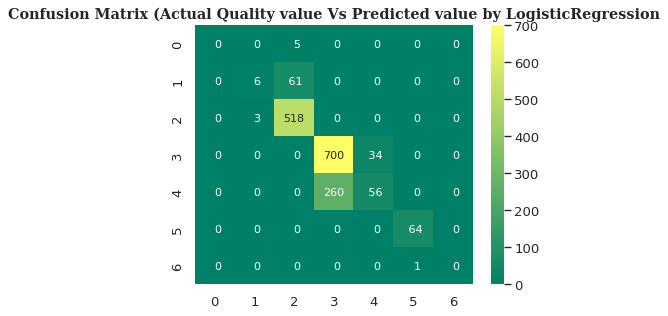

In [226]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
model = LogisticRegression()
model.fit(x_train , y_train)
y_pred_LogReg = model.predict(x_test)
cm_plot(y_test, y_pred_LogReg, 'LogisticRegression', 'summer')

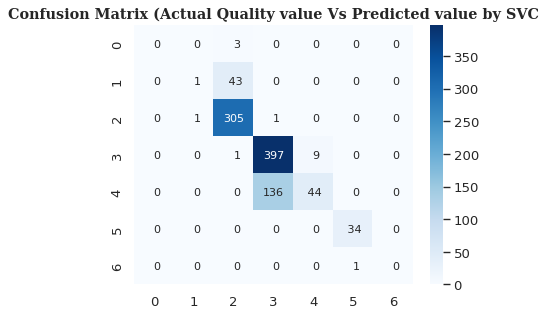

In [228]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = SVC()
model.fit(x_train , y_train)
y_pred_SVC = model.predict(x_test)
cm_plot(y_test, y_pred_SVC, 'SVC', 'Blues')

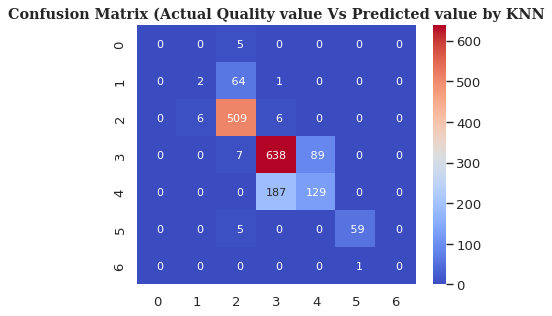

In [230]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
model = KNeighborsClassifier()
model.fit(x_train , y_train)
y_pred_KNN = model.predict(x_test)
cm_plot(y_test, y_pred_KNN, 'KNN', 'coolwarm')

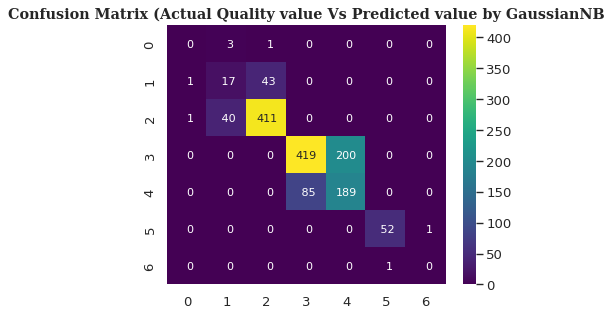

In [232]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = GaussianNB()
model.fit(x_train , y_train)
y_pred_GNB = model.predict(x_test)
cm_plot(y_test, y_pred_GNB, 'GaussianNB', 'viridis')